We study Table 13.2 on p 240 of Lange and Chapter 13 question 11 (on page 240) and Chapter 14, Example
14.10.1 on p246.
The table contains counts of the number of days a given number of deaths occurred.

In [22]:
import math as mt

In [1]:
import numpy as np
freq = np.array([162,267,271,185,111,61,27,8,3,1])

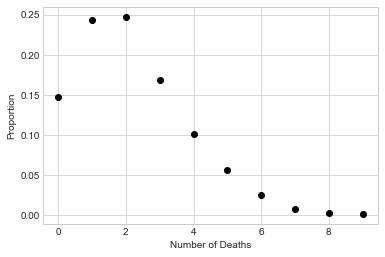

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
## proportion of different number of deaths
plt.plot(np.arange(freq.size), freq/np.sum(freq), 'o', color='black')
plt.xlabel("Number of Deaths")
plt.ylabel("Proportion");

## Problem 1

Confirm Lange's claim in question 11 that "A Poisson distribution gives a poor fit to these data . . ." by computing
the MLE of the Poisson parameter (this can be done by hand using calculus) and plotting the resulting
probability mass function over the observed data. They should be a bit discrepant (thus justifying the claim).

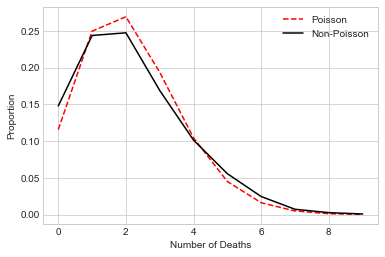

In [4]:
import math
lamda = np.sum(freq*np.arange(freq.size))/np.sum(freq)
pmf = []
for i in range(0, freq.size):
    pmf.append((np.exp(-lamda)*(lamda**i))/math.factorial(i))
plt.style.use('seaborn-whitegrid')
## proportion of different number of deaths
plt.plot(np.arange(freq.size), pmf, '--', color='red')
plt.plot(np.arange(freq.size), freq/np.sum(freq), '-', color='black')
plt.xlabel("Number of Deaths")
plt.ylabel("Proportion");
plt.legend(['Poisson', 'Non-Poisson'], loc='upper right')

## Problem 2

Fit the $\alpha$, $\mu_1$ and $\mu_2$ parameters for the mixture of two Poissons model proposed in Question 11. You must write your own fitting code (cannot use `scipy optimize` or R `optim`). You can write any sort of optimizer you like such as gradient ascent, Newton's method (or any of its varients), or an EM approach. Discuss how you select starting parameters and monitor convergence. You can confirm your results by also using Python or R built in optimizers.

In [6]:
import numpy as np
def K(a, mu1, mu2):
    return((a*np.exp(-mu1)*(mu1**i)/math.factorial(i)) + ((1-a)*np.exp(-mu2)*(mu2**i)/math.factorial(i)));

In [7]:
Niter = 100
init_par = np.array([0.5, 0.7, 0.55])
par = np.zeros((Niter+1,3))
par[0] = init_par

In [8]:
par[0:5,:]

array([[0.5 , 0.7 , 0.55],
       [0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.  ]])

In [11]:
def loglik(a, mu1, mu2):
    p = []
    for i in range(freq.size):
        p.append(freq[i]*math.log(K(a, mu1, mu2)))
    return(sum(p))

In [12]:
def f_a(a, mu1, mu2):
    v = []
    for i in range(freq.size):
        v.append(((np.exp(-mu1)*(mu1**i) - (np.exp(-mu2)*(mu2**i)))/math.factorial(i))*(freq[i]/K(a, mu1, mu2)))
    return(sum(v))

In [13]:
def f_mu1(a, mu1, mu2):
    e = []
    for i in range(freq.size):
        e.append(((np.exp(-mu1)*i*(mu1**(i-1)))-((mu1**i)*np.exp(-mu1)))*((freq[i]*a)/(K(a, mu1, mu2)*math.factorial(i))))
    return(sum(e))

In [14]:
def f_mu2(a, mu1, mu2):
    d = []
    for i in range(freq.size):
        d.append(((np.exp(-mu2)*(i*mu2**(i-1)))-((mu2**i)*np.exp(-mu2)))*((freq[i]*(1-a))/(K(a, mu1, mu2)*math.factorial(i))))
    return(sum(d))

In [15]:
gamma = 1
grad = np.zeros((Niter, 3))
for i in range(Niter):
    grad[i,0] = f_a(par[i, 0], par[i, 1], par[i, 2])
    grad[i,1] = f_mu1(par[i, 0], par[i, 1], par[i, 2])
    grad[i,2] = f_mu2(par[i, 0], par[i, 1], par[i, 2])
    half = True
    while(half):
        temp = par[i, :] + (gamma*grad[i, :])
        if(loglik(temp[0], temp[1], temp[2]) < loglik(par[i, 0], par[i, 1], par[i, 2])):
            gamma = gamma/2
        else: half = False
    par[i+1, :] = temp

In [16]:
print("Final estimates [alpha, mu1, mu2] =",par[-1,:])

Final estimates [alpha, mu1, mu2] = [0.66305004 1.35491734 1.28945263]


In [20]:
para = par[Niter, :]

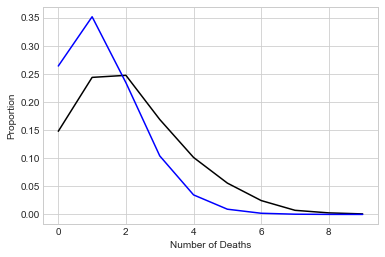

In [23]:
pmfnew = []
for i in range(freq.size):
    pmfnew.append(((para[0]*np.exp(-para[1])*(para[1]**i) + (1-para[0])*np.exp(-para[2])*(para[2]**i)) / mt.factorial(i)))

plt.plot(np.arange(freq.size), freq/np.sum(freq), color='black')
plt.plot(np.arange(freq.size), pmfnew, color='blue')
plt.xlabel("Number of Deaths")
plt.ylabel("Proportion");